# **Import Necessary Libraries**

In [ ]:
import numpy as np
from scipy.signal import firwin, lfilter
from numpy.fft import fft, ifft

# **Initial Setup**

In [ ]:
RATE = 44100
AMPLITUDE_LIMIT = 1000
FILTER_ORDER = 101  # Number of FIR taps

# **Low Pass Filter & Distortion Function**

In [ ]:
def lowPass(x, f):
    X = fft(x)
    n = len(X)

    cutoff_idx = int(f * n / RATE)

    cutoff_idx = max(1, min(n // 2, cutoff_idx))
    H = np.zeros(n)
    H[:cutoff_idx] = 1
    H[-cutoff_idx:] = 1
    Y = X * H
    y_filtered = ifft(Y).real


    y_filtered = np.clip(y_filtered, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
    return y_filtered

In [ ]:
def apply_fir_filter(data, cutoff):
    nyquist = RATE / 2.0
    normalized_cutoff = max(0.01, min(0.99, cutoff / nyquist))
    taps = firwin(FILTER_ORDER, normalized_cutoff)
    filtered_data = lfilter(taps, 1.0, data)

    filtered_data = np.clip(filtered_data, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
    return filtered_data

In [ ]:
def apply_distortion(data, gain):
    distorted = np.clip(data * gain, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)
    return distorted

In [ ]:
CHUNK = 1024
t = np.arange(CHUNK) / RATE
signal = 200 * np.sin(2 * np.pi * 440 * t) + 100 * np.sin(2 * np.pi * 880 * t) + 50 * np.random.randn(CHUNK)
signal = np.clip(signal, -AMPLITUDE_LIMIT, AMPLITUDE_LIMIT)

cutoff_frequency = 500
gain_value = 3.0

## **Applying Lowpass using FFT**

In [ ]:
signal_fft_filtered = lowPass(signal, cutoff_frequency)

## **Applying FIR Filter**

In [ ]:
signal_fir_filtered = apply_fir_filter(signal, cutoff_frequency)

## **Applying Distortion**


In [ ]:
signal_distorted = apply_distortion(signal, gain_value)

## **Plotting**

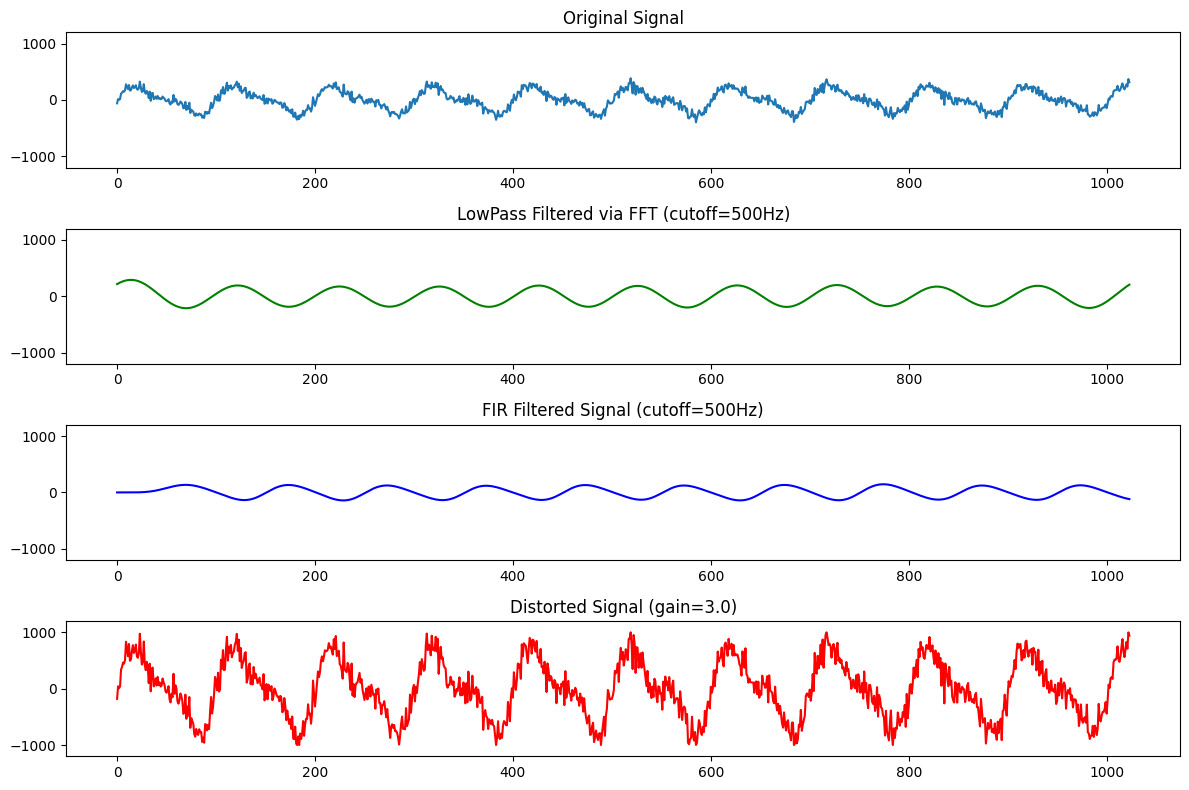

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(signal)
plt.title("Original Signal")
plt.ylim(-AMPLITUDE_LIMIT * 1.2, AMPLITUDE_LIMIT * 1.2)

plt.subplot(4, 1, 2)
plt.plot(signal_fft_filtered, color='green')
plt.title(f"LowPass Filtered via FFT (cutoff={cutoff_frequency}Hz)")
plt.ylim(-AMPLITUDE_LIMIT * 1.2, AMPLITUDE_LIMIT * 1.2)

plt.subplot(4, 1, 3)
plt.plot(signal_fir_filtered, color='blue')
plt.title(f"FIR Filtered Signal (cutoff={cutoff_frequency}Hz)")
plt.ylim(-AMPLITUDE_LIMIT * 1.2, AMPLITUDE_LIMIT * 1.2)

plt.subplot(4, 1, 4)
plt.plot(signal_distorted, color='red')
plt.title(f"Distorted Signal (gain={gain_value})")
plt.ylim(-AMPLITUDE_LIMIT * 1.2, AMPLITUDE_LIMIT * 1.2)

plt.tight_layout()
plt.show()